In [3]:
%run Package.ipynb

In [4]:
path = 'F:\Build Model\Business Loan Application\machine learning\Code dev model\Data_ML'

In [5]:
sample=pd.read_pickle(path+'/d_sample_approved_model.pkl')
discrim=pd.read_pickle(path+'/d_discrim_approved_model.pkl')
moni=pd.read_pickle(path+'/d_moni_approved_model.pkl')
    
sample.columns = [col.upper() for col in sample.columns]
discrim.columns = [col.upper() for col in discrim.columns]
moni.columns = [col.upper() for col in moni.columns]

sample.shape, discrim.shape, moni.shape

((15061, 295), (3889, 295), (22230, 293))

### Nếu mẫu train quá lớn, dùng 1 phần mẫu train để train model, sau đó đánh giá lại trên full mẫu

# Data

In [6]:
shortlist= ['AGE','GENDER','INCOME_SI_SAL','REQ_AMT_INCOME_DIV','C_COLLATERAL_CODE','C_COLLATERAL_TYPE','NO_LAST_B2_12M','UNSE_OUTSTANDING','UNSE_OUTSTANDING_ALL','LIMIT_CC','BALANCE_CC','BAL_LIMIT_CC_PCB_DIV','NUMBER_CC','AVG_CC_OUTS_3M','AVG_CC_OUTS_6M','MONTHLY_PMT_UNSE','MONTHLY_PMT_UNSE_PCB','CURR_OVD_FLAG','WORST_STTS','WORST_STTS_ALL',
'TOTAL_CURR_OVD_AMT','NUMBER_OVD_GROUP2_12M','WORST_STATUS_6M','WORST_STATUS_12M','WORST_STATUS_24M','WORST_STATUS_36M','C_WORST_STATUS_36M','C_WORST_STATUS_36M2','TIME_WORST_STTS','TIME_WORST_STTS_ALL','TIME_LAST_OVD_GROUP2','TIME_LAST_OVD_GROUP3_5','SERVICE_TYPE_PCB_2','N_QUERY_30D',
'N_QUERY_90D','N_QUERY_30D_90D','TIME_ISSUE_EXIST_CC','TIME_ISSUE_LATEST_CC','TIME_ISSUE_LATEST_UPL','TIME_ISSUE_EXIST_SE','BALANCE_CC_VPB','BAL_LIMIT_CC_VPB_DIV','BALANCE_CC_ALL','BAL_LIMIT_CC_ALL_DIV','FL_TEMINATE_DEPO','FL_DEPO','FL_DEPO_PAYROLL','CURR_UNSE_LOAN_AMT','MAX_OVD_CURR','CURR_LOAN_AMT',
'MONTHLY_PMT_UNSE_VPB','MONTHLY_PMT_UNSE_ALL','BALANCE_UNSE_ALL','BALANCE_SE_ALL','NO_CURR_UNS','DISBURSED_AMT','MOB','MAXDPD_3M_BFRAPPL','MAXDPD_6M_BFRAPPL','MAXDPD_12M_BFRAPPL','N_7_6MBFRACC','N_7_1YBFRACC','N_4_1YBFRACC','N_10_6MBFRACC','TOTAL_REQ_OUTS','TOTAL_REQ_BAL_UNSE','INCOME_REQ_UNSE_DIV'
,'TOTAL_REQ_BAL_LOAN_ALL','NO_APP_REJECTED_6MNTH','NO_APP_APPROVED_6MNTH','NO_CRE_APP_3MNTH','NO_APP_6M','TIME_WITH_VPB','SERVICE_TYPE_VPB_2','SERVICE_TYPE_ALL_2'
]

In [7]:
train=sample
valid = discrim[(discrim['YEARMONTH'] == 202112.0) | (discrim['YEARMONTH'] == 202201.0) ]
oot =discrim[(discrim['YEARMONTH'] == 202202.0)]

x_train = train[shortlist]

x_valid = discrim[(discrim['YEARMONTH'] == 202112.0) | (discrim['YEARMONTH'] == 202201.0) ][shortlist]

x_oot   = discrim[(discrim['YEARMONTH'] == 202202.0)][shortlist]


train.shape, valid.shape, oot.shape,x_train.shape, x_valid.shape, x_oot.shape

((15061, 295), (3221, 295), (668, 295), (15061, 75), (3221, 75), (668, 75))

In [ ]:
x_train.head()

In [16]:
x_train['BAD'].sum()/x_train.shape[0],x_valid['BAD'].sum()/x_valid.shape[0],x_oot['BAD'].sum()/x_oot.shape[0]

(0.07077883274682956, 0.07451102142191866, 0.07035928143712575)

In [19]:
x_oot[x_oot['YEARMONTH']==202202.0]['BAD'].sum()/x_oot[x_oot['YEARMONTH']==202202.0].shape[0]

0.07035928143712575

In [10]:
descriptive = pd.DataFrame({'Missing':train[shortlist].isnull().sum()})\
.reset_index().rename(columns={'index':'Variables'})
descriptive['%Missing']= round(descriptive['Missing']/x_train.shape[0]*100,2)
descriptive[descriptive['Missing']>0]#['Variables']

Empty DataFrame
Columns: [Variables, Missing, %Missing]
Index: []

### Nên bỏ biến có 1 nhóm quá lớn (>98%) -> bỏ ra khỏi shortlist luôn

In [32]:
X_oot.head()

RRT_ID CUSTOMER_ID  VALUE_DATE    DOC_NUMBER  \
25  LN2202195232675     4675864  2022-02-28     190959471   
30  LN2202165210899     6910557  2022-02-22     205482117   
34  LN2202215237359     7819033  2022-02-24  031068014260   
35  LN2202215240529     2259707  2022-02-24  031173007554   
36  LN2202215241386     7828017  2022-02-28  035092002554   

                        SUB_PRODUCT CREATION_DATE     PRODUCT_GROUP  \
25  Working Capital in Credit Limit    2022-02-19  Retail Household   
30  Working Capital in Credit Limit    2022-02-16  Retail Household   
34  Working Capital in Credit Limit    2022-02-21  Retail Household   
35  Working Capital in Credit Limit    2022-02-21  Retail Household   
36  Working Capital in Credit Limit    2022-02-21  Retail Household   

   FINAL_STATUS                      PROMOTION_CODE  MAXDPD_12M_AF  \
25     Approved  24077 3M 2021 8.0 QÐ 288 HKD3 LC1A           -1.0   
30     Approved                                  00            4.0   
34     Approved  24077 3M 2021 8.0 QÐ 288 HKD3 LC1A           -1.0   
35     Approved  24079 3M 2021 8.0 QÐ 288 HKD3 LC1B            5.0   
36     Approved                                  00           -1.0   

    MAXDPD_9M_AF  MAXDPD_15M_AF  FL_CCN_COVID_12M  FL_CCN_COVID_9M  \
25          -1.0           -1.0               NaN              NaN   
30           4.0            4.0               NaN              NaN   
34          -1.0           -1.0               NaN              NaN   
35           5.0            5.0               NaN              NaN   
36          -1.0           -1.0               NaN              NaN   

    FL_CCN_COVID_15M CCN_DATE_MIN CCN_DATE_OUT  FL_CCN_NEXT  MAXDPD_RST_TIME  \
25               NaN          NaN          NaN          NaN              NaN   
30               NaN          NaN          NaN          NaN              NaN   
34               NaN          NaN          NaN          NaN              NaN   
35               NaN          NaN          NaN          NaN              NaN   
36               NaN          NaN          NaN          NaN              NaN   

    MONTH_IN_CCN DATE_TARGET_15M_NEW  MAXDPD_TARGET_NEW  DEFAULT_12M  \
25           NaN                 NaN                NaN          0.0   
30           NaN                 NaN                NaN          0.0   
34           NaN                 NaN                NaN          0.0   
35           NaN                 NaN                NaN          0.0   
36           NaN                 NaN                NaN          0.0   

    DEFAULT_CURRENT  DEFAULT_9M  DEFAULT_15M DN_FINAL_15M DN_FINAL_9M  \
25              0.0         0.0          0.0            G           G   
30              0.0         0.0          0.0            G           G   
34              0.0         0.0          0.0            G           G   
35              0.0         0.0          0.0            G           G   
36              0.0         0.0          0.0            G           G   

   DN_FINAL_12M  DEFAULT_NEW DN_FINAL_V2  BAD_BANK  BIG_LOAN   ADD_ID_1  \
25            G          0.0           G       0.0       0.0        NaN   
30            G          0.0           G       0.0       0.0        NaN   
34            G          0.0           G       0.0       0.0  030751961   
35            G          0.0           G       0.0       0.0  030912914   
36            G          0.0           G       0.0       0.0  168430477   

   ADD_ID_2 ADD_ID_3 INCOME_TYPE   AGE  AGE_IDCARD MARITAL_STATUS ORG_GENDER  \
25      NaN      NaN       INC14  59.0     8.40000        MARRIED       Male   
30      NaN      NaN       INC14  48.0     6.49315        MARRIED       Male   
34      NaN      NaN       INC14  59.0     0.53151        MARRIED       Male   
35      NaN      NaN       INC14  59.0     2.00548         SINGLE     Female   
36      NaN      NaN       INC14  48.0     0.10685        MARRIED       Male   

   EDUCATION  MONTHLY_INCOME MAIN_INCOME HOME_PROPERTY  \
25       NaN      60000000.0      

In [26]:
0.02*x_train.shape[0]

301.22

# lgb.train

## khai báo num_boost_round 

- num_boost_round = 3000-5000 (B-score) - linh hoạt nếu bị overfitting
- num_boost_round = 10000 (A-score)


In [15]:
import optuna
from optuna.samplers import TPESampler
from itertools import chain

num_boost_round=5000


def objective(trial):

    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boost_from_average': True,
        'verbose': -1,
        'boosting_type': 'gbdt',  
        'max_bin': trial.suggest_int('max_bin', 2, 10),  #số bin của 1 biến: min=2, max=10
        'max_depth': trial.suggest_int('max_depth', 2, 5),  #độ sâu của 1 tree: min=2, max=10
        'num_leaves': trial.suggest_int('num_leaves', 5, 30),  #số lá của 1 cây: min=5, max=30
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 300, 5000),  #số quan sát tối thiểu trên mỗi lá:min=0.02*train.shape[0], max=5000
        'learning_rate': trial.suggest_discrete_uniform('learning_rate', 0.001, 0.5, 0.0001),   #hệ số learning_rate điều chỉnh gradient descent
#         'min_sum_hessian_in_leaf': trial.suggest_loguniform('min_sum_hessian_in_leaf', 0.02, 0.1),#qs tính bằng %
#         'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1),  #điều chỉnh hệ số
#         'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1),  #điều chỉnh hệ số
#         'feature_fraction': trial.suggest_loguniform('feature_fraction', 0.5, 1),  #train model bằng 50-100% số biến (dễ lỗi)
        'seed':0
    }
    hist_eval=dict()
    d_train = lgb.Dataset(x_train, train['GOOD'])
    d_valid = lgb.Dataset(x_valid, valid['GOOD'])
    
    model = lgb.train(params, d_train, num_boost_round=num_boost_round, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=50, 
                      verbose_eval=0, 
                      evals_result=hist_eval)
    
    return 2*hist_eval['valid_1']['auc'][model.best_iteration-1]-1

# Với PD, EWS:
Cân nhắc điều chỉnh các hệ số: 
- slentry = 0.0001 (A-score), slentry=0.0005 (B-score)
- num_boost_round=3000 (số quan sát tập train khoảng >100000qs)
- tập train quá lớn thì train model trên một tập đại diện và chấm điểm lại trên full mẫu

Nên chạy với 1 loop trước, nếu thời gian lâu thì nên để n_loops ít và chạy nhiều máy, để qua đêm

In [16]:
%%time

optuna.logging.enable_propagation()  # Propagate logs to the root logger.
optuna.logging.disable_default_handler()  # Stop showing logs in sys.stderr.
optuna.logging.set_verbosity(optuna.logging.WARNING)

n_loops = 20
num_boost_round=5000
slentry = 0.0005

result = pd.DataFrame({'Params':'',
                       'Train':float(),
                       'Valid': float(),
                        'OOT': float(),
                       'Feature_final':'',
                       'Random_state':int()}, index=[]) 

for i in range(n_loops):
    print(i)
    random_state = np.array(np.random.rand(1)*1000).astype(int)[0]
    study = optuna.create_study(direction='maximize',sampler=TPESampler(seed =random_state))
    study.optimize(objective, n_trials=100)


    best = study.best_trial
    x = {'objective': 'binary',
         'metric': 'auc',
         'boost_from_average': True,
         'verbose': -1,
         'boosting_type': 'gbdt',
         'seed':0}
    y= best.params
    params = dict(chain(x.items(), y.items()))

    df_select_step, feature_final = varselect_greedy(x_train.columns.tolist(), 
                                                     params, 
                                                     slentry=slentry,
                                                     num_boost_round=num_boost_round)

    hist_eval=dict()
    d_train = lgb.Dataset(x_train[feature_final], train['GOOD'])
    d_valid = lgb.Dataset(x_valid[feature_final], valid['GOOD'])

    model = lgb.train(params, d_train, num_boost_round=num_boost_round, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=50, 
                      verbose_eval=0, 
                      evals_result=hist_eval)

    value = pd.concat([pd.DataFrame({'Params' : str(params),
                                     'Train':2*roc_auc_score(train['GOOD'], model.predict(train[feature_final], num_iteration=model.best_iteration))-1,
                                     'Valid':2*roc_auc_score(valid['GOOD'], model.predict(valid[feature_final], num_iteration=model.best_iteration))-1,
                                      'OOT':2*roc_auc_score(oot['GOOD'], model.predict(oot[feature_final], num_iteration=model.best_iteration))-1,
                                     'Feature_final':str(feature_final),
                                     'Random_state':random_state
                                    }, index=[0])
                      ], axis=1) 
    result=result.append(value)
    result.to_excel('optuna.xlsx', index=False)

0


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.19%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.72%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.05%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 46.26%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.86%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 49.55%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.37%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  GENDER                           with Gini 51.67%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 52.27%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 52.90%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE                 with Gini 53.34%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 53.48%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  FL_TEMINATE_DEPO                 with Gini 53.74%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  NO_CRE_APP_3MNTH                 with Gini 54.16%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  TIME_ISSUE_EXIST_CC              with Gini 54.25%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

1


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.98%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.27%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.52%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 45.92%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 48.18%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP2             with Gini 48.91%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 49.38%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 50.46%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.89%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 51.62%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 52.38%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  CURR_OVD_FLAG                    with Gini 52.79%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 52.92%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 53.74%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  MAX_OVD_CURR                     with Gini 54.36%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

2


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.66%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.48%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.43%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 46.00%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.52%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 48.79%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 50.06%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.50%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.29%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 52.19%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 52.66%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 53.21%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 53.47%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

3


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.37%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.33%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.45%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 45.54%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 46.90%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 48.01%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 48.98%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.04%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 50.67%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.56%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.32%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 53.09%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 53.90%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP3_5           with Gini 54.18%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

4


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.45%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.50%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.57%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 45.55%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 46.96%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 48.49%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 49.73%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.78%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 51.43%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 52.03%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 52.79%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 53.60%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

5


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 35.07%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.17%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.38%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 45.80%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.59%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 48.88%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 49.88%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.38%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 51.22%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TIME_ISSUE_LATEST_UPL            with Gini 51.47%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 52.02%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  MOB                              with Gini 52.26%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 52.41%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.49%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  C_WORST_STATUS_36M2              with Gini 52.81%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  FL_DEPO_PAYROLL                  with Gini 52.99%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

6


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.77%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.97%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.26%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.44%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 48.11%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 49.53%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.36%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 51.38%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 51.69%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.75%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

7


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.57%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.91%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.78%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 45.92%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 47.71%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 48.94%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 49.93%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 50.96%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 51.58%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.57%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 52.76%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP2             with Gini 53.06%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE                 with Gini 53.40%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_UNSE               with Gini 53.46%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

8


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.92%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.35%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.89%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.37%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 47.65%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 48.73%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 49.81%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 50.47%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  GENDER                           with Gini 51.28%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 52.03%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_CRE_APP_3MNTH                 with Gini 52.47%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

9


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.26%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.50%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.09%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 46.12%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 47.96%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 49.18%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 50.30%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.97%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP2             with Gini 51.61%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 52.32%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  MAX_OVD_CURR                     with Gini 52.91%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  NUMBER_OVD_GROUP2_12M            with Gini 53.07%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 53.58%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_UNSE               with Gini 53.73%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

10


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.81%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.28%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.38%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.29%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.11%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 49.70%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 50.34%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  FL_DEPO                          with Gini 51.10%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 51.52%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  WORST_STATUS_12M                 with Gini 51.80%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_UNSE               with Gini 52.19%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

11


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 35.07%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.93%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.28%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.53%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 48.35%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 49.40%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 50.04%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 50.78%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  GENDER                           with Gini 51.11%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 51.77%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 52.16%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_UNSE               with Gini 52.40%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 52.58%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 53.26%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 53.87%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 54.11%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 54.33%


Forward Selection:   0%|          | 0/57 [00:00<?, ?it/s]

Added  NUMBER_OVD_GROUP2_12M            with Gini 54.77%


Forward Selection:   0%|          | 0/56 [00:00<?, ?it/s]

12


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.45%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.50%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.57%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 45.55%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 46.96%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 48.49%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 49.73%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.78%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 51.43%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 52.03%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 52.79%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 53.60%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

13


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.45%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.53%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.56%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 45.51%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 47.21%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.26%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 49.66%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.72%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 51.80%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.55%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  FL_DEPO                          with Gini 53.25%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  NO_CRE_APP_3MNTH                 with Gini 53.72%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  GENDER                           with Gini 54.23%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 54.46%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  TIME_ISSUE_LATEST_UPL            with Gini 55.19%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

14


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.83%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.65%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.47%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 46.03%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 47.81%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 49.27%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 49.99%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 50.96%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  GENDER                           with Gini 51.84%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 52.66%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 53.21%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.44%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 54.34%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

15


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.93%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.15%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.87%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.16%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.82%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.14%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 50.30%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 51.38%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.76%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 52.63%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 53.13%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  GENDER                           with Gini 53.86%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 54.41%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

16


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.83%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.78%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.47%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.21%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.88%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 49.33%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 49.88%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 51.06%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 51.52%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_UNSE               with Gini 51.59%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

17


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.95%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.33%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.39%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 45.97%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.60%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.67%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 49.33%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  FL_DEPO                          with Gini 50.19%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 50.78%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 52.12%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  FL_TEMINATE_DEPO                 with Gini 52.45%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

18


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.05%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.44%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.30%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 46.25%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 47.60%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 48.79%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.98%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 50.85%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.72%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.06%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 53.56%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  BALANCE_CC_VPB                   with Gini 54.44%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

19


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.46%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.71%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.66%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 45.56%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 47.29%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.51%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 49.78%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  FL_DEPO                          with Gini 50.57%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.98%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 51.96%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.89%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 53.47%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 53.81%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  AVG_CC_OUTS_6M                   with Gini 54.00%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Wall time: 46min 57s


# option2

In [17]:
import optuna
from optuna.samplers import TPESampler
from itertools import chain

num_boost_round=10000


def objective(trial):

    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boost_from_average': True,
        'verbose': -1,
        'boosting_type': 'gbdt',  
        'max_bin': trial.suggest_int('max_bin', 2, 10),
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'learning_rate': trial.suggest_discrete_uniform('learning_rate', 0.001, 0.5, 0.0001),
        'num_leaves': trial.suggest_int('num_leaves', 5, 30),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 300, 5000),
#         'min_sum_hessian_in_leaf': trial.suggest_loguniform('min_sum_hessian_in_leaf', 0.02, 0.1),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1),
        'seed':0
    }
    hist_eval=dict()
    d_train = lgb.Dataset(x_train, train['GOOD'])
    d_valid = lgb.Dataset(x_valid, valid['GOOD'])
    
    model = lgb.train(params, d_train, num_boost_round=num_boost_round, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=50, 
                      verbose_eval=0, 
                      evals_result=hist_eval)
    
    return 2*hist_eval['valid_1']['auc'][model.best_iteration-1]-1

In [18]:
%%time

optuna.logging.enable_propagation()  # Propagate logs to the root logger.
optuna.logging.disable_default_handler()  # Stop showing logs in sys.stderr.
optuna.logging.set_verbosity(optuna.logging.WARNING)

n_loops = 20
num_boost_round=5000
slentry = 0.0001

result = pd.DataFrame({'Params':'',
                       'Train':float(),
                       'Valid': float(),
                       'OOT': float(),
                       'Feature_final':'',
                       'Random_state':int()}, index=[]) 

for i in range(n_loops):
    print(i)
    random_state = np.array(np.random.rand(1)*1000).astype(int)[0]
    study = optuna.create_study(direction='maximize',sampler=TPESampler(seed =random_state))
    study.optimize(objective, n_trials=100)


    best = study.best_trial
    x = {'objective': 'binary',
         'metric': 'auc',
         'boost_from_average': True,
         'verbose': -1,
         'boosting_type': 'gbdt',
         'seed':0}
    y= best.params
    params = dict(chain(x.items(), y.items()))

    df_select_step, feature_final = varselect_greedy(x_train.columns.tolist(), 
                                                     params, 
                                                     slentry=slentry,
                                                     num_boost_round=num_boost_round)

    hist_eval=dict()
    d_train = lgb.Dataset(x_train[feature_final], train['GOOD'])
    d_valid = lgb.Dataset(x_valid[feature_final], valid['GOOD'])

    model = lgb.train(params, d_train, num_boost_round=num_boost_round, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=50, 
                      verbose_eval=0, 
                      evals_result=hist_eval)

    value = pd.concat([pd.DataFrame({'Params' : str(params),
                                     'Train':2*roc_auc_score(train['GOOD'], model.predict(train[feature_final], num_iteration=model.best_iteration))-1,
                                     'Valid':2*roc_auc_score(valid['GOOD'], model.predict(valid[feature_final], num_iteration=model.best_iteration))-1,
                                     'OOT':2*roc_auc_score(oot['GOOD'], model.predict(oot[feature_final], num_iteration=model.best_iteration))-1,
                                     'Feature_final':str(feature_final),
                                     'Random_state':random_state
                                    }, index=[0])
                      ], axis=1) 
    result=result.append(value)
    result.to_excel('optuna2.xlsx', index=False)

0


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.71%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.44%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.95%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.07%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.99%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.48%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 50.40%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 51.05%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.99%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.95%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  FL_DEPO                          with Gini 53.33%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 53.64%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 53.79%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 53.98%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  SERVICE_TYPE_ALL_2               with Gini 54.15%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

1


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.28%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 38.99%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.30%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 45.96%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.35%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 49.03%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 49.51%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  C_WORST_STATUS_36M               with Gini 50.43%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

2


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.83%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.96%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.88%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.14%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.58%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 49.10%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 50.37%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.93%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 51.70%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 52.32%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 53.16%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.62%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 54.35%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 54.57%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

3


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.86%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.15%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.05%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.64%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.87%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.03%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.08%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 50.78%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 51.60%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 52.09%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 52.41%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 53.32%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 53.92%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  TIME_WORST_STTS                  with Gini 53.98%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  AVG_CC_OUTS_3M                   with Gini 54.06%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

4


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 35.07%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.58%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 43.42%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  AGE                              with Gini 45.47%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.70%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 48.53%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.54%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.42%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 51.18%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 51.76%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 52.20%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 52.72%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

5


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 35.07%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.80%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.96%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.64%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 47.89%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 49.41%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 49.80%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 50.56%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 51.22%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 51.58%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.41%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  BALANCE_CC_VPB                   with Gini 52.85%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

6


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.83%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.90%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.78%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.10%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.59%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 48.94%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.69%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.48%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 51.55%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.11%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 53.02%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.63%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  CURR_OVD_FLAG                    with Gini 53.95%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  FL_DEPO_PAYROLL                  with Gini 54.23%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  N_QUERY_30D                      with Gini 54.26%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP3_5           with Gini 54.32%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

7


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 35.01%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.88%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.69%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.03%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.70%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 49.01%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 49.66%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 50.63%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TIME_ISSUE_LATEST_UPL            with Gini 51.08%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.69%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 52.16%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 52.65%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 53.37%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  NUMBER_OVD_GROUP2_12M            with Gini 53.54%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  CURR_OVD_FLAG                    with Gini 53.69%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 54.12%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 54.28%


Forward Selection:   0%|          | 0/57 [00:00<?, ?it/s]

Added  AVG_CC_OUTS_3M                   with Gini 54.43%


Forward Selection:   0%|          | 0/56 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 54.68%


Forward Selection:   0%|          | 0/55 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 54.82%


Forward Selection:   0%|          | 0/54 [00:00<?, ?it/s]

8


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.28%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.90%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.61%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.13%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 48.06%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 49.51%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP2             with Gini 50.47%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_WORST_STTS                  with Gini 50.58%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 51.19%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 51.64%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 52.01%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE                 with Gini 53.04%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

9


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.88%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.84%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.13%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.35%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.88%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 49.47%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.84%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 51.74%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 52.41%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.79%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 53.11%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 53.59%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  NUMBER_CC                        with Gini 53.83%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

10


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.18%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.77%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.85%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.03%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.96%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 49.24%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.38%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.26%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE                 with Gini 51.87%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 52.47%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 52.84%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP3_5           with Gini 53.36%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  CURR_OVD_FLAG                    with Gini 53.48%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  FL_DEPO_PAYROLL                  with Gini 53.63%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 53.81%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  TIME_ISSUE_LATEST_UPL            with Gini 54.32%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

11


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.97%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.72%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.32%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 45.76%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.49%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 48.84%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 49.52%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 50.53%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.78%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 51.79%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 52.62%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

12


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 35.10%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.01%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.68%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 46.01%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.54%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 48.87%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 49.62%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.67%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 51.09%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 51.70%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.46%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 52.57%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  BALANCE_CC_VPB                   with Gini 53.04%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 53.50%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

13


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.84%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.08%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.41%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.13%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 48.28%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 49.35%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.01%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 50.93%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 51.84%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.64%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 53.04%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  NUMBER_CC                        with Gini 53.24%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 53.31%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 53.97%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 54.43%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  FL_DEPO                          with Gini 54.64%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 54.67%


Forward Selection:   0%|          | 0/57 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 54.72%


Forward Selection:   0%|          | 0/56 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 54.94%


Forward Selection:   0%|          | 0/55 [00:00<?, ?it/s]

14


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.60%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.92%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.20%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 45.98%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 47.75%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 49.21%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.25%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP2             with Gini 50.98%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 51.59%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 52.10%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.64%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 53.11%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 53.95%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 54.14%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

15


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.77%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.82%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.01%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.44%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 47.85%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP2             with Gini 49.10%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 49.71%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.49%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 51.72%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 52.21%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 52.65%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE                 with Gini 53.43%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  GENDER                           with Gini 53.63%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

16


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.83%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.77%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.12%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.24%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 47.59%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 49.18%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 49.68%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 51.08%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

17


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.48%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.20%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.57%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 45.82%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_UNSE               with Gini 47.54%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 48.23%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 48.86%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 50.17%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.90%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 51.69%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TIME_ISSUE_LATEST_UPL            with Gini 52.32%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 53.16%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.78%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 54.06%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  SERVICE_TYPE_ALL_2               with Gini 54.38%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

18


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.89%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.07%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 43.20%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  AGE                              with Gini 45.62%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 47.62%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 48.84%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.46%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.46%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 50.84%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 51.80%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TIME_ISSUE_LATEST_UPL            with Gini 52.67%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

19


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.92%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.17%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.58%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 45.78%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 47.94%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.02%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 50.09%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 50.80%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 51.30%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.92%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 52.51%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.06%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  GENDER                           with Gini 53.22%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 53.65%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Wall time: 55min 15s


In [ ]:
# option3

In [19]:
import optuna
from optuna.samplers import TPESampler
from itertools import chain

num_boost_round=10000


def objective(trial):

    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boost_from_average': True,
        'verbose': -1,
        'boosting_type': 'gbdt',  
        'max_bin': trial.suggest_int('max_bin', 2, 10),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_discrete_uniform('learning_rate', 0.001, 0.5, 0.0001),
        'num_leaves': trial.suggest_int('num_leaves', 5, 30),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 300, 5000),
#         'min_sum_hessian_in_leaf': trial.suggest_loguniform('min_sum_hessian_in_leaf', 0.02, 0.1),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1),
        'feature_fraction': trial.suggest_loguniform('feature_fraction', 0.5, 1),
        'seed':0
    }
    hist_eval=dict()
    d_train = lgb.Dataset(x_train, train['GOOD'])
    d_valid = lgb.Dataset(x_valid, valid['GOOD'])
    
    model = lgb.train(params, d_train, num_boost_round=num_boost_round, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=50, 
                      verbose_eval=0, 
                      evals_result=hist_eval)
    
    return 2*hist_eval['valid_1']['auc'][model.best_iteration-1]-1

In [20]:
%%time

optuna.logging.enable_propagation()  # Propagate logs to the root logger.
optuna.logging.disable_default_handler()  # Stop showing logs in sys.stderr.
optuna.logging.set_verbosity(optuna.logging.WARNING)

n_loops = 20
num_boost_round=5000
slentry = 0.0001

result = pd.DataFrame({'Params':'',
                       'Train':float(),
                       'Valid': float(),
                       'OOT': float(),
                       'Feature_final':'',
                       'Random_state':int()}, index=[]) 

for i in range(n_loops):
    print(i)
    random_state = np.array(np.random.rand(1)*1000).astype(int)[0]
    study = optuna.create_study(direction='maximize',sampler=TPESampler(seed =random_state))
    study.optimize(objective, n_trials=100)


    best = study.best_trial
    x = {'objective': 'binary',
         'metric': 'auc',
         'boost_from_average': True,
         'verbose': -1,
         'boosting_type': 'gbdt',
         'seed':0}
    y= best.params
    params = dict(chain(x.items(), y.items()))

    df_select_step, feature_final = varselect_greedy(x_train.columns.tolist(), 
                                                     params, 
                                                     slentry=slentry,
                                                     num_boost_round=num_boost_round)

    hist_eval=dict()
    d_train = lgb.Dataset(x_train[feature_final], train['GOOD'])
    d_valid = lgb.Dataset(x_valid[feature_final], valid['GOOD'])

    model = lgb.train(params, d_train, num_boost_round=num_boost_round, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=50, 
                      verbose_eval=0, 
                      evals_result=hist_eval)

    value = pd.concat([pd.DataFrame({'Params' : str(params),
                                     'Train':2*roc_auc_score(train['GOOD'], model.predict(train[feature_final], num_iteration=model.best_iteration))-1,
                                     'Valid':2*roc_auc_score(valid['GOOD'], model.predict(valid[feature_final], num_iteration=model.best_iteration))-1,
                                     'OOT':2*roc_auc_score(oot['GOOD'], model.predict(oot[feature_final], num_iteration=model.best_iteration))-1,
                                     'Feature_final':str(feature_final),
                                     'Random_state':random_state
                                    }, index=[0])
                      ], axis=1) 
    result=result.append(value)
    result.to_excel('optuna3.xlsx', index=False)

0


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.84%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.31%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.30%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.65%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 48.17%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 49.58%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 50.05%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 50.85%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.92%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.34%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 52.73%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 53.21%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

1


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.12%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.95%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.21%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 45.88%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.71%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.89%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 50.57%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 50.86%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 51.36%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 52.20%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 53.25%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  C_WORST_STATUS_36M2              with Gini 53.51%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

2


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.92%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.49%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.57%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 45.95%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.50%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 48.02%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 48.85%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 50.40%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 51.60%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 52.12%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  FL_DEPO_PAYROLL                  with Gini 52.62%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 53.22%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 53.60%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 53.77%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

3


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.31%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 38.96%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.89%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 46.02%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 46.48%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 47.91%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 49.45%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 50.53%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 51.58%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.55%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 53.39%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 54.03%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 54.34%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  CURR_OVD_FLAG                    with Gini 54.62%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 54.80%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 55.04%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

4


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.12%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.66%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.25%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 45.75%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.25%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.90%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 50.34%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.03%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 51.27%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  NUMBER_OVD_GROUP2_12M            with Gini 52.17%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 52.74%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 53.21%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  C_WORST_STATUS_36M               with Gini 53.57%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

5


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.92%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 38.85%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.69%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 46.07%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 46.97%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 48.09%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 49.66%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 50.78%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 51.12%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 52.10%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 53.19%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  GENDER                           with Gini 53.99%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  NO_APP_APPROVED_6MNTH            with Gini 54.18%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 54.19%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

6


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.56%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.62%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.35%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.63%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.47%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 49.37%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 50.59%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 51.12%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 51.82%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.61%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 52.89%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.40%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 53.76%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 54.26%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

7


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.15%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 38.50%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.29%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.04%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.45%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.76%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 50.11%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 50.45%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.54%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 52.26%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 53.11%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  GENDER                           with Gini 53.31%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  FL_DEPO                          with Gini 53.62%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  CURR_OVD_FLAG                    with Gini 54.02%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 54.12%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_UNSE               with Gini 54.23%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 54.26%


Forward Selection:   0%|          | 0/57 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE                 with Gini 55.03%


Forward Selection:   0%|          | 0/56 [00:00<?, ?it/s]

8


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.48%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.65%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.55%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 46.06%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 46.96%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.92%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 49.34%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 50.55%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.55%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_UNSE               with Gini 52.34%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.95%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  MAX_OVD_CURR                     with Gini 53.27%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 53.46%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  GENDER                           with Gini 53.84%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 54.62%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  NUMBER_CC                        with Gini 55.07%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

9


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.42%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 37.58%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.54%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 45.77%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 46.64%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 47.90%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 48.98%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 50.01%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.78%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.89%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_APP_APPROVED_6MNTH            with Gini 52.55%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 52.77%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 53.25%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 53.62%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 54.06%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  TIME_ISSUE_LATEST_UPL            with Gini 54.49%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 54.66%


Forward Selection:   0%|          | 0/57 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 54.97%


Forward Selection:   0%|          | 0/56 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 55.17%


Forward Selection:   0%|          | 0/55 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 55.21%


Forward Selection:   0%|          | 0/54 [00:00<?, ?it/s]

Added  MOB                              with Gini 55.22%


Forward Selection:   0%|          | 0/53 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE_ALL             with Gini 55.32%


Forward Selection:   0%|          | 0/52 [00:00<?, ?it/s]

10


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.14%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.36%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.20%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 45.81%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 47.81%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

11


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING                 with Gini 24.11%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.09%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.63%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 45.31%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 46.64%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 48.91%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 50.16%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 51.08%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 52.47%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 52.85%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 53.21%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TOTAL_CURR_OVD_AMT               with Gini 53.59%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  GENDER                           with Gini 53.62%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 54.16%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  N_QUERY_30D                      with Gini 54.42%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 54.53%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

12


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.71%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.86%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.34%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 46.25%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 48.24%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.78%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 50.38%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 51.18%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.62%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 52.51%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 52.94%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  GENDER                           with Gini 53.14%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.68%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

13


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.07%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.77%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.10%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.00%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  GENDER                           with Gini 47.93%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 49.21%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 50.68%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  FL_DEPO_PAYROLL                  with Gini 50.85%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 51.42%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 52.14%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 52.29%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 52.93%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

14


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 35.07%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.09%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.22%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.46%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.18%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 49.07%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 49.69%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.85%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 51.94%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 52.20%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 52.43%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 53.48%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.80%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  FL_DEPO_PAYROLL                  with Gini 54.01%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

15


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.14%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.36%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.20%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 45.81%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 47.81%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

16


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.56%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.83%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.40%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 46.15%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 47.95%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.44%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.35%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 50.81%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 51.66%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

17


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.14%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.46%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.27%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 45.88%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.60%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.53%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 50.36%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 50.77%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.38%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 53.28%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

18


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.56%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.84%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.00%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 45.67%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.38%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 49.06%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP2             with Gini 50.24%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 50.37%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 51.30%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

19


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.28%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.66%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.70%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 46.14%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 47.67%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 49.36%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.10%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.24%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE                 with Gini 51.82%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 52.70%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 52.96%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.26%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TIME_ISSUE_LATEST_UPL            with Gini 53.66%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 53.85%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 54.33%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  CURR_OVD_FLAG                    with Gini 54.86%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

Wall time: 1h 7min 38s


In [ ]:
# option4

In [21]:
import optuna
from optuna.samplers import TPESampler
from itertools import chain


num_boost_round=10000


def objective(trial):

    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boost_from_average': True,
        'verbose': -1,
        'boosting_type': 'gbdt',  
        'max_bin': trial.suggest_int('max_bin', 2, 10),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_discrete_uniform('learning_rate', 0.001, 0.5, 0.0001),
        'num_leaves': trial.suggest_int('num_leaves', 5, 30),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 430, 5000),
        'min_sum_hessian_in_leaf': trial.suggest_loguniform('min_sum_hessian_in_leaf', 0.02, 0.1),
#         'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1),
#         'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1),
#         'feature_fraction': trial.suggest_loguniform('feature_fraction', 0.5, 1),
        'seed':0
    }
    hist_eval=dict()
    d_train = lgb.Dataset(x_train, train['GOOD'])
    d_valid = lgb.Dataset(x_valid, valid['GOOD'])
    
    model = lgb.train(params, d_train, num_boost_round=num_boost_round, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=50, 
                      verbose_eval=0, 
                      evals_result=hist_eval)
    return 2*hist_eval['valid_1']['auc'][model.best_iteration-1]-1

In [22]:
%%time

optuna.logging.enable_propagation()  # Propagate logs to the root logger.
optuna.logging.disable_default_handler()  # Stop showing logs in sys.stderr.
optuna.logging.set_verbosity(optuna.logging.WARNING)

n_loops = 20
num_boost_round=5000
slentry = 0.0001

result = pd.DataFrame({'Params':'',
                       'Train':float(),
                       'Valid': float(),
                       'OOT': float(),
                       'Feature_final':'',
                       'Random_state':int()}, index=[]) 

for i in range(n_loops):
    print(i)
    random_state = np.array(np.random.rand(1)*1000).astype(int)[0]
    study = optuna.create_study(direction='maximize',sampler=TPESampler(seed =random_state))
    study.optimize(objective, n_trials=100)


    best = study.best_trial
    x = {'objective': 'binary',
         'metric': 'auc',
         'boost_from_average': True,
         'verbose': -1,
         'boosting_type': 'gbdt',
         'seed':0}
    y= best.params
    params = dict(chain(x.items(), y.items()))

    df_select_step, feature_final = varselect_greedy(x_train.columns.tolist(), 
                                                     params, 
                                                     slentry=slentry,
                                                     num_boost_round=num_boost_round)

    hist_eval=dict()
    d_train = lgb.Dataset(x_train[feature_final], train['GOOD'])
    d_valid = lgb.Dataset(x_valid[feature_final], valid['GOOD'])

    model = lgb.train(params, d_train, num_boost_round=num_boost_round, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=50, 
                      verbose_eval=0, 
                      evals_result=hist_eval)

    value = pd.concat([pd.DataFrame({'Params' : str(params),
                                     'Train':2*roc_auc_score(train['GOOD'], model.predict(train[feature_final], num_iteration=model.best_iteration))-1,
                                     'Valid':2*roc_auc_score(valid['GOOD'], model.predict(valid[feature_final], num_iteration=model.best_iteration))-1,
                                     'OOT':2*roc_auc_score(oot['GOOD'], model.predict(oot[feature_final], num_iteration=model.best_iteration))-1,
                                     'Feature_final':str(feature_final),
                                     'Random_state':random_state
                                    }, index=[0])
                      ], axis=1) 
    result=result.append(value)
    result.to_excel('optuna4.xlsx', index=False)

0


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.73%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.54%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.93%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 45.98%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_VPB                   with Gini 47.03%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 48.19%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 49.03%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 49.93%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

1


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.51%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 38.45%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 42.99%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 45.60%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 48.10%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  C_WORST_STATUS_36M               with Gini 48.98%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BALANCE_CC_VPB                   with Gini 49.48%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_WORST_STTS_ALL              with Gini 50.16%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 50.27%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TIME_ISSUE_EXIST_SE              with Gini 50.69%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TIME_ISSUE_EXIST_CC              with Gini 50.71%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

2


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.75%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.43%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.17%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_OUTS                   with Gini 45.84%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 46.88%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.77%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  FL_TEMINATE_DEPO                 with Gini 50.03%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 50.27%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  NO_CRE_APP_3MNTH                 with Gini 50.70%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 50.76%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 50.80%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  LIMIT_CC                         with Gini 50.99%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 51.49%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 51.83%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP3_5           with Gini 51.96%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  TIME_ISSUE_EXIST_SE              with Gini 52.10%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

3


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.82%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.41%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.51%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.09%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 47.50%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.39%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 49.40%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 50.49%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 51.12%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE_VPB             with Gini 51.45%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 51.83%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  AVG_CC_OUTS_3M                   with Gini 51.96%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

4


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.84%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.39%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.42%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 46.19%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 47.11%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 48.67%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAX_OVD_CURR                     with Gini 50.12%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.44%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TIME_WORST_STTS_ALL              with Gini 50.99%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

5


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.05%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.01%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.42%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_UNSE               with Gini 45.94%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 46.88%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 48.63%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 49.10%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP2             with Gini 50.21%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 51.04%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 51.29%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  MAX_OVD_CURR                     with Gini 52.13%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TIME_ISSUE_EXIST_CC              with Gini 52.24%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP3_5           with Gini 52.30%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

6


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.72%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 38.83%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.76%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 45.79%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 47.16%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 48.56%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.34%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  CURR_LOAN_AMT                    with Gini 50.52%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 50.88%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

7


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.56%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.02%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 42.99%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  C_WORST_STATUS_36M               with Gini 45.75%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.71%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.67%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 48.55%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE                 with Gini 49.52%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.30%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 51.58%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 51.97%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.81%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  N_QUERY_30D_90D                  with Gini 53.34%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  FL_TEMINATE_DEPO                 with Gini 54.07%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  WORST_STATUS_36M                 with Gini 55.00%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

8


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.79%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.65%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.91%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 46.16%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 47.69%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.23%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.47%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_CC_VPB                   with Gini 51.03%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 51.66%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE                 with Gini 52.29%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 52.49%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TIME_ISSUE_EXIST_CC              with Gini 52.87%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_UNSE               with Gini 52.93%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  TIME_WORST_STTS_ALL              with Gini 53.17%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

9


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.51%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 38.27%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 42.99%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 45.62%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 47.32%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 48.49%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 49.33%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_CC_VPB                   with Gini 50.34%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

10


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.53%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 38.25%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.20%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 46.53%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 47.30%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 48.31%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 49.69%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP2             with Gini 51.01%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  NUMBER_CC                        with Gini 51.12%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  BALANCE_CC_VPB                   with Gini 51.53%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

11


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.60%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.36%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.55%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 45.42%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 47.16%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 48.32%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 49.51%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 50.46%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 50.83%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.32%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 51.76%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 52.36%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  C_COLLATERAL_CODE                with Gini 52.76%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 53.09%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE_VPB             with Gini 53.39%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  AVG_CC_OUTS_6M                   with Gini 53.42%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

Added  NO_APP_APPROVED_6MNTH            with Gini 53.56%


Forward Selection:   0%|          | 0/57 [00:00<?, ?it/s]

12


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.51%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 38.91%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.41%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 45.57%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 47.40%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 48.90%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 49.58%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  N_QUERY_30D                      with Gini 50.14%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  BALANCE_CC                       with Gini 50.47%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  AVG_CC_OUTS_3M                   with Gini 50.49%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

13


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.71%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.25%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.66%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 46.04%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 47.43%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 48.69%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 49.60%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  FL_TEMINATE_DEPO                 with Gini 50.32%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 50.60%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 51.27%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_APP_APPROVED_6MNTH            with Gini 51.96%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  N_QUERY_30D                      with Gini 52.12%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 52.66%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

14


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.77%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.07%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.49%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.23%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.50%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 48.81%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.05%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.01%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 51.71%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 52.52%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.76%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 53.16%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  AVG_CC_OUTS_3M                   with Gini 53.60%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  AVG_CC_OUTS_6M                   with Gini 53.64%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

15


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.80%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.49%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.64%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.26%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 48.02%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.16%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 50.17%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 50.98%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 51.69%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  AVG_CC_OUTS_6M                   with Gini 51.79%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP3_5           with Gini 51.81%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

16


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.42%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.60%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.89%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_OUTS                   with Gini 45.45%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 46.53%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 48.04%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.00%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE                 with Gini 49.52%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 49.72%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.36%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 51.13%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 51.73%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP2             with Gini 51.98%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  TIME_WORST_STTS                  with Gini 52.84%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 53.24%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

17


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.79%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 38.90%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.17%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 45.67%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 46.92%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  GENDER                           with Gini 48.28%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 48.80%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 49.98%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 51.44%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TIME_WORST_STTS                  with Gini 53.06%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

18


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.51%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 38.27%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 42.99%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 45.62%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 47.32%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 48.49%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 49.33%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_CC_VPB                   with Gini 50.34%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

19


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.98%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.30%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.57%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 45.63%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 47.34%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.88%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.14%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 51.01%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 51.75%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 52.32%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  GENDER                           with Gini 53.14%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  C_WORST_STATUS_36M2              with Gini 53.34%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_UNSE               with Gini 53.72%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  NO_CRE_APP_3MNTH                 with Gini 54.10%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Wall time: 29min 29s


In [ ]:
# option5

In [23]:
import optuna
from optuna.samplers import TPESampler
from itertools import chain

num_boost_round=10000


def objective(trial):

    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boost_from_average': True,
        'verbose': -1,
        'boosting_type': 'gbdt',  
        'max_bin': trial.suggest_int('max_bin', 2, 10),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_discrete_uniform('learning_rate', 0.001, 0.5, 0.0001),
        'num_leaves': trial.suggest_int('num_leaves', 5, 30),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 300, 5000),
        'min_sum_hessian_in_leaf': trial.suggest_loguniform('min_sum_hessian_in_leaf', 0.02, 0.1),
#         'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1),
#         'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1),
#         'feature_fraction': trial.suggest_loguniform('feature_fraction', 0.5, 1),
        'seed':0
    }
    hist_eval=dict()
    d_train = lgb.Dataset(x_train, train['GOOD'])
    d_valid = lgb.Dataset(x_valid, valid['GOOD'])
    
    model = lgb.train(params, d_train, num_boost_round=num_boost_round, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=50, 
                      verbose_eval=0, 
                      evals_result=hist_eval)
    return 2*hist_eval['valid_1']['auc'][model.best_iteration-1]-1

In [24]:
%%time

optuna.logging.enable_propagation()  # Propagate logs to the root logger.
optuna.logging.disable_default_handler()  # Stop showing logs in sys.stderr.
optuna.logging.set_verbosity(optuna.logging.WARNING)

n_loops = 20
num_boost_round=5000
slentry = 0.0001

result = pd.DataFrame({'Params':'',
                       'Train':float(),
                       'Valid': float(),
                       'OOT': float(),
                       'Feature_final':'',
                       'Random_state':int()}, index=[]) 

for i in range(n_loops):
    print(i)
    random_state = np.array(np.random.rand(1)*1000).astype(int)[0]
    study = optuna.create_study(direction='maximize',sampler=TPESampler(seed =random_state))
    study.optimize(objective, n_trials=100)


    best = study.best_trial
    x = {'objective': 'binary',
         'metric': 'auc',
         'boost_from_average': True,
         'verbose': -1,
         'boosting_type': 'gbdt',
         'seed':0}
    y= best.params
    params = dict(chain(x.items(), y.items()))

    df_select_step, feature_final = varselect_greedy(x_train.columns.tolist(), 
                                                     params, 
                                                     slentry=slentry,
                                                     num_boost_round=num_boost_round)

    hist_eval=dict()
    d_train = lgb.Dataset(x_train[feature_final], train['GOOD'])
    d_valid = lgb.Dataset(x_valid[feature_final], valid['GOOD'])

    model = lgb.train(params, d_train, num_boost_round=num_boost_round, valid_sets=[d_train, d_valid],
                      early_stopping_rounds=50, 
                      verbose_eval=0, 
                      evals_result=hist_eval)

    value = pd.concat([pd.DataFrame({'Params' : str(params),
                                     'Train':2*roc_auc_score(train['GOOD'], model.predict(train[feature_final], num_iteration=model.best_iteration))-1,
                                     'Valid':2*roc_auc_score(valid['GOOD'], model.predict(valid[feature_final], num_iteration=model.best_iteration))-1,
                                     'OOT':2*roc_auc_score(oot['GOOD'], model.predict(oot[feature_final], num_iteration=model.best_iteration))-1,
                                     'Feature_final':str(feature_final),
                                     'Random_state':random_state
                                    }, index=[0])
                      ], axis=1) 
    result=result.append(value)
    result.to_excel('optuna5.xlsx', index=False)

0


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.92%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.56%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.63%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 45.60%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 46.77%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 47.95%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 48.72%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 49.67%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.95%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 52.04%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 53.07%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 53.56%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.92%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  TIME_ISSUE_LATEST_CC             with Gini 54.32%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

1


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.92%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.56%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.70%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 45.86%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 46.69%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 48.18%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 49.22%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 50.22%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 51.44%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 52.42%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 52.83%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  FL_DEPO_PAYROLL                  with Gini 53.28%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 53.64%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  GENDER                           with Gini 54.08%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_UNSE               with Gini 54.52%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  NO_CRE_APP_3MNTH                 with Gini 54.55%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

Added  N_QUERY_30D                      with Gini 54.85%


Forward Selection:   0%|          | 0/57 [00:00<?, ?it/s]

2


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.92%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.47%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.70%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 45.59%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 46.49%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 47.67%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 49.05%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  GENDER                           with Gini 49.95%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 50.97%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 51.59%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  CURR_OVD_FLAG                    with Gini 52.12%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

3


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.73%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.61%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.76%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.03%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 47.73%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 49.49%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.53%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 51.53%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 52.17%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  C_COLLATERAL_CODE                with Gini 52.59%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

4


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 35.03%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.94%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.58%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_ALL_DIV             with Gini 46.33%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.28%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 48.99%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 49.13%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.05%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 51.14%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 52.20%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 52.61%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 53.09%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  AVG_CC_OUTS_3M                   with Gini 53.29%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 53.60%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  CURR_OVD_FLAG                    with Gini 53.71%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  GENDER                           with Gini 53.89%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

Added  WORST_STATUS_12M                 with Gini 53.95%


Forward Selection:   0%|          | 0/57 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE                 with Gini 54.00%


Forward Selection:   0%|          | 0/56 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 54.21%


Forward Selection:   0%|          | 0/55 [00:00<?, ?it/s]

Added  TIME_ISSUE_EXIST_SE              with Gini 54.74%


Forward Selection:   0%|          | 0/54 [00:00<?, ?it/s]

5


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.99%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.72%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.52%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 45.78%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 47.66%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_CRE_APP_3MNTH                 with Gini 48.61%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 49.21%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 49.82%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.87%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  FL_DEPO_PAYROLL                  with Gini 51.94%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.18%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  CURR_OVD_FLAG                    with Gini 52.57%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 53.00%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 53.76%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

6


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.92%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.39%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.71%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 45.73%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.94%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.35%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 49.16%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  GENDER                           with Gini 50.59%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 51.32%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 53.14%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

7


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 35.01%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.75%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.97%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 45.93%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 47.35%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.73%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.08%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 50.91%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 51.95%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 52.41%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.06%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 53.14%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 53.40%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 53.85%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 54.31%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE_VPB             with Gini 54.70%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 54.99%


Forward Selection:   0%|          | 0/57 [00:00<?, ?it/s]

Added  CURR_UNSE_LOAN_AMT               with Gini 55.11%


Forward Selection:   0%|          | 0/56 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 55.17%


Forward Selection:   0%|          | 0/55 [00:00<?, ?it/s]

Added  AVG_CC_OUTS_3M                   with Gini 55.42%


Forward Selection:   0%|          | 0/54 [00:00<?, ?it/s]

8


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.92%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.58%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.61%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 45.76%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 47.36%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 48.28%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 49.42%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 49.84%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 51.05%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.72%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 52.68%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 53.37%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  NO_CRE_APP_3MNTH                 with Gini 53.76%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  GENDER                           with Gini 54.20%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  TOTAL_CURR_OVD_AMT               with Gini 54.74%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 54.95%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

9


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.28%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.34%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.42%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 45.66%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP2             with Gini 46.81%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 48.10%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 49.53%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 50.08%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 50.61%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  FL_DEPO                          with Gini 51.75%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

10


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.99%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.90%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.87%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.13%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 47.51%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 48.60%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 49.46%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_ISSUE_LATEST_UPL            with Gini 50.32%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 50.93%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  GENDER                           with Gini 51.76%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 52.12%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 52.69%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  MAXDPD_6M_BFRAPPL                with Gini 53.42%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  LIMIT_CC                         with Gini 53.48%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

11


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.31%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.46%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.17%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 46.04%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 47.18%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 48.41%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 49.07%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 49.86%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 50.73%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 51.62%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 52.62%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  WORST_STTS                       with Gini 53.27%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 53.58%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 54.06%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  AVG_CC_OUTS_6M                   with Gini 54.33%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

12


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.92%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.40%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.48%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 45.68%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 47.01%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 48.16%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  GENDER                           with Gini 48.83%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 49.74%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 50.71%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 51.72%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 52.62%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TIME_ISSUE_LATEST_UPL            with Gini 53.31%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 53.58%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 54.63%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

13


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.45%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.49%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.35%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 45.48%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 46.89%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 48.69%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 49.62%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.48%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  GENDER                           with Gini 51.39%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.21%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 53.18%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 53.56%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  MONTHLY_PMT_UNSE                 with Gini 53.97%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  TIME_LAST_OVD_GROUP3_5           with Gini 54.49%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  NUMBER_CC                        with Gini 54.71%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

14


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 33.92%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.23%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.52%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 45.90%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 46.91%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 47.25%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 48.43%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.89%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  FL_DEPO_PAYROLL                  with Gini 49.94%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 51.11%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.53%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  GENDER                           with Gini 53.18%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 53.93%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  CURR_OVD_FLAG                    with Gini 54.63%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  NUMBER_CC                        with Gini 54.70%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

Added  TOTAL_CURR_OVD_AMT               with Gini 54.94%


Forward Selection:   0%|          | 0/58 [00:00<?, ?it/s]

15


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.99%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.16%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.02%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.55%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.55%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 48.95%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 50.00%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 50.85%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 52.69%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.51%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  NUMBER_CC                        with Gini 53.72%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

16


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.27%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.03%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 44.12%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.18%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 47.54%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.97%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  C_COLLATERAL_TYPE                with Gini 50.01%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 51.05%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  GENDER                           with Gini 51.66%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.32%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 53.17%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 53.37%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 54.02%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 54.53%


Forward Selection:   0%|          | 0/60 [00:00<?, ?it/s]

Added  TIME_WORST_STTS                  with Gini 54.95%


Forward Selection:   0%|          | 0/59 [00:00<?, ?it/s]

17


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 35.07%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.59%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.67%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.42%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 47.78%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 49.20%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 50.53%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  BALANCE_UNSE_ALL                 with Gini 51.60%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 52.34%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 52.95%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  LIMIT_CC                         with Gini 53.08%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  NO_APP_REJECTED_6MNTH            with Gini 53.15%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  CURR_UNSE_LOAN_AMT               with Gini 53.24%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

18


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 35.07%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 40.30%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.88%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  INCOME_REQ_UNSE_DIV              with Gini 46.71%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 48.28%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 49.23%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  BAL_LIMIT_CC_PCB_DIV             with Gini 50.39%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  TIME_WITH_VPB                    with Gini 51.44%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  UNSE_OUTSTANDING_ALL             with Gini 52.21%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 52.83%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  TIME_ISSUE_LATEST_UPL            with Gini 53.16%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 53.48%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Added  GENDER                           with Gini 53.78%


Forward Selection:   0%|          | 0/61 [00:00<?, ?it/s]

19


Forward Selection:   0%|          | 0/75 [00:00<?, ?it/s]

Added  SERVICE_TYPE_PCB_2               with Gini 25.08%


Forward Selection:   0%|          | 0/74 [00:00<?, ?it/s]

Added  MAXDPD_12M_BFRAPPL               with Gini 34.32%


Forward Selection:   0%|          | 0/73 [00:00<?, ?it/s]

Added  N_QUERY_90D                      with Gini 39.90%


Forward Selection:   0%|          | 0/72 [00:00<?, ?it/s]

Added  AGE                              with Gini 43.86%


Forward Selection:   0%|          | 0/71 [00:00<?, ?it/s]

Added  BALANCE_CC_ALL                   with Gini 46.34%


Forward Selection:   0%|          | 0/70 [00:00<?, ?it/s]

Added  WORST_STTS_ALL                   with Gini 48.00%


Forward Selection:   0%|          | 0/69 [00:00<?, ?it/s]

Added  TOTAL_REQ_BAL_LOAN_ALL           with Gini 49.17%


Forward Selection:   0%|          | 0/68 [00:00<?, ?it/s]

Added  NO_LAST_B2_12M                   with Gini 50.04%


Forward Selection:   0%|          | 0/67 [00:00<?, ?it/s]

Added  REQ_AMT_INCOME_DIV               with Gini 50.59%


Forward Selection:   0%|          | 0/66 [00:00<?, ?it/s]

Added  GENDER                           with Gini 51.33%


Forward Selection:   0%|          | 0/65 [00:00<?, ?it/s]

Added  NO_APP_6M                        with Gini 52.03%


Forward Selection:   0%|          | 0/64 [00:00<?, ?it/s]

Added  MAXDPD_3M_BFRAPPL                with Gini 52.48%


Forward Selection:   0%|          | 0/63 [00:00<?, ?it/s]

Added  WORST_STATUS_24M                 with Gini 52.93%


Forward Selection:   0%|          | 0/62 [00:00<?, ?it/s]

Wall time: 58min 14s


# Model Final

In [ ]:
feature_final

In [22]:
params ={'objective': 'binary',
         'metric': 'auc',
         'boost_from_average': True,
         'verbose': -1,
         'boosting_type': 'gbdt',
         'seed': 0,
         'max_bin': 9,
         'max_depth': 8,
         'num_leaves': 13,
         'min_data_in_leaf': 450,
         'learning_rate': 0.1337}

feature_final = ['VAR1', 'GENDER', 'VAR2', 'VAR3', 'VAR5', 'VAR4', 'VAR8', 'VAR15']

d_train = lgb.Dataset(train[feature_final], train['GOOD'])
d_valid = lgb.Dataset(valid[feature_final], valid['GOOD'])


model_v2 = lgb.train(params, d_train, num_boost_round=10000, valid_sets=[d_train, d_valid],
                     early_stopping_rounds=50, verbose_eval=5)

Training until validation scores don't improve for 50 rounds
[5]	training's auc: 0.773728	valid_1's auc: 0.771649
[10]	training's auc: 0.782323	valid_1's auc: 0.77749
[15]	training's auc: 0.78682	valid_1's auc: 0.783343
[20]	training's auc: 0.78871	valid_1's auc: 0.785933
[25]	training's auc: 0.79122	valid_1's auc: 0.787521
[30]	training's auc: 0.792195	valid_1's auc: 0.788064
[35]	training's auc: 0.793609	valid_1's auc: 0.787724
[40]	training's auc: 0.794518	valid_1's auc: 0.787477
[45]	training's auc: 0.794898	valid_1's auc: 0.787682
[50]	training's auc: 0.795164	valid_1's auc: 0.787665
[55]	training's auc: 0.795286	valid_1's auc: 0.788029
[60]	training's auc: 0.79626	valid_1's auc: 0.787801
[65]	training's auc: 0.796656	valid_1's auc: 0.788599
[70]	training's auc: 0.796973	valid_1's auc: 0.789365
[75]	training's auc: 0.797435	valid_1's auc: 0.788962
[80]	training's auc: 0.797829	valid_1's auc: 0.788537
[85]	training's auc: 0.798041	valid_1's auc: 0.789187
[90]	training's auc: 0.7981

In [23]:
print('Gini of Train: {:3}'.format(2*roc_auc_score(train['GOOD'], model_v2.predict(train[feature_final], num_iteration=model_v2.best_iteration))-1))
print('Gini of Validate: {:3}'.format(2*roc_auc_score(valid['GOOD'], model_v2.predict(valid[feature_final], num_iteration=model_v2.best_iteration))-1))
print('Gini of Out of time: {:3}'.format(2*roc_auc_score(oot['GOOD'], model_v2.predict(oot[feature_final], num_iteration=model_v2.best_iteration))-1))

Gini of Train: 0.6008747952359124
Gini of Validate: 0.584218182541155
Gini of Out of time: 0.5200054789913482


In [24]:
df_oot = oot.copy()
df_oot['Pred'] = np.array(model_v2.predict(oot[feature_final], num_iteration=model_v2.best_iteration))

print('Gini of approve 202110: {:3}'.format(2*roc_auc_score(df_oot[df_oot['YEARMONTH']==202110]['GOOD'], 
                                                           df_oot[df_oot['YEARMONTH']==202110]['Pred'])-1))

print('Gini of approve 202111: {:3}'.format(2*roc_auc_score(df_oot[df_oot['YEARMONTH']==202111]['GOOD'], 
                                                         df_oot[df_oot['YEARMONTH']==202111]['Pred'])-1))

Gini of approve 202110: 0.5196709067845839
Gini of approve 202111: 0.5206060022800965


## SHAP Calculation

In [25]:
light_gbm_fit = model_v2

In [26]:
import shap
import pyspark
explainer = shap.TreeExplainer(light_gbm_fit)
data_shap=shap.sample(train[feature_final], train.shape[0])
shap_values = explainer.shap_values(data_shap)

C extension was not built during install!


## Mean|SHAP value|

In [ ]:
SHAP_value = pd.DataFrame(i for i in shap_values[1])
SHAP_value.columns = data_shap.columns
SHAP = pd.DataFrame({'SHAPValue':SHAP_value.abs().mean(axis=0)}).rename_axis('Feature').reset_index()
SHAP.style.hide_index()

In [ ]:
fig, axs = plt.subplots(figsize=(4.5, 3))
axs.set_facecolor('white')
axs.set_ylabel('', fontsize=10)

shap.summary_plot(shap_values[1],data_shap, feature_names = data_shap.columns, plot_size=[9,8])

fig.savefig('Plot/summary_plot_cc.png', bbox_inches="tight")

## SHAP output for single factor analysis

In [30]:
def shap_plot(var, xmax=False):
    fig, axs = plt.subplots(figsize=(4.5, 3))
    axs.set_facecolor('white')
    axs.set_ylabel(var, fontsize=11)

    shap.summary_plot(shap_values[1][:,data_shap.columns.get_loc(var)].reshape(data_shap.shape[0],1),
                      data_shap[[var]], feature_names = var, max_display=1, plot_size=[5,2], class_inds='')
    fig.savefig('Plot/'+var+'_summary_plot.png', bbox_inches="tight")

    fig, axs = plt.subplots(figsize=(4.5,3.2))
    axs.set_facecolor('white')
    if xmax==False:
        shap.dependence_plot(var, shap_values[1], data_shap, interaction_index=None, ax=axs)
    else:
        shap.dependence_plot(var, shap_values[1], data_shap, interaction_index=None, ax=axs, 
                             xmax=np.percentile(train[var].dropna(),99))
    fig.savefig('Plot/'+var+'_dependence_plot.png', bbox_inches="tight")

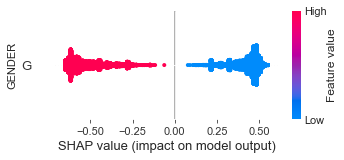

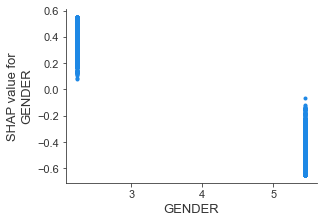

In [41]:
shap_plot('GENDER', xmax=False)

# Save model

In [34]:
model_v2.save_model('Model parameters.txt')

In [24]:
model = lgb.cv(params, d_train, num_boost_round =10000, nfold=10, eval_train_metric=d_valid,
                  early_stopping_rounds=50, verbose_eval=5, seed=254272)
model

[5]	cv_agg's train auc: 0.783591 + 0.00317358	cv_agg's valid auc: 0.773057 + 0.0337052
[10]	cv_agg's train auc: 0.798588 + 0.00380736	cv_agg's valid auc: 0.788794 + 0.0320604
[15]	cv_agg's train auc: 0.803549 + 0.00364768	cv_agg's valid auc: 0.791107 + 0.0307797
[20]	cv_agg's train auc: 0.805922 + 0.00364821	cv_agg's valid auc: 0.793773 + 0.0286942
[25]	cv_agg's train auc: 0.807789 + 0.00313832	cv_agg's valid auc: 0.795541 + 0.0294865
[30]	cv_agg's train auc: 0.808528 + 0.00318972	cv_agg's valid auc: 0.796164 + 0.0292478
[35]	cv_agg's train auc: 0.809127 + 0.00324453	cv_agg's valid auc: 0.795312 + 0.0290473
[40]	cv_agg's train auc: 0.809711 + 0.00301819	cv_agg's valid auc: 0.794912 + 0.0286552
[45]	cv_agg's train auc: 0.810489 + 0.00301015	cv_agg's valid auc: 0.795112 + 0.028787
[50]	cv_agg's train auc: 0.810819 + 0.00308931	cv_agg's valid auc: 0.795209 + 0.0276458
[55]	cv_agg's train auc: 0.81117 + 0.00314808	cv_agg's valid auc: 0.79498 + 0.0277589
[60]	cv_agg's train auc: 0.811707 + 

{'train auc-mean': [0.7011339584065095,
  0.7595761409649365,
  0.766524798493401,
  0.7759316733354984,
  0.7835914753528417,
  0.7875547245803507,
  0.7911939641413095,
  0.7949771947775509,
  0.7969139171620062,
  0.7985877646535675,
  0.8000504772250607,
  0.8009643080497583,
  0.8015692206602163,
  0.8023872541828357,
  0.8035486996653429,
  0.8043532189650995,
  0.804672638430816,
  0.8048942414408119,
  0.8053778488002041,
  0.805921813087996,
  0.8062924133029409,
  0.8067396947362256,
  0.8071948906416939,
  0.8075423206799315,
  0.8077887264596824,
  0.8079834043909807,
  0.8080928342451387,
  0.8081754572599354,
  0.8083437887587941,
  0.808528229119511],
 'train auc-stdv': [0.006336314915979491,
  0.005615201772812638,
  0.006047889180926481,
  0.0044368690739644305,
  0.003173584884351029,
  0.0036770425086760407,
  0.002873023861087862,
  0.004432239227092553,
  0.004380207442706602,
  0.0038073645696072547,
  0.0037590398493882937,
  0.0039497946746657325,
  0.0040639252

In [25]:
np.array(model['train auc-mean']).max()*2-1, np.array(model['valid auc-mean']).mean()*2-1

(0.6170564582390221, 0.5690273294350434)

## Scoring

In [36]:
feature_final = ['VAR1', 'GENDER', 'VAR2', 'VAR3', 'VAR5', 'VAR4', 'VAR8', 'VAR15']

model_final = lgb.Booster(model_file='Model parameters.txt')

In [37]:
y_train_pred = model_final.predict(train[feature_final], num_iteration=model_final.best_iteration)
y_valid_pred = model_final.predict(valid[feature_final], num_iteration=model_final.best_iteration)
y_oot_pred = model_final.predict(oot[feature_final], num_iteration=model_final.best_iteration)
train['Score'] = y_train_pred
train['Score'] = round(train['Score']*1000,0)

valid['Score'] = y_valid_pred
valid['Score'] = round(valid['Score']*1000,0)

oot['Score'] = y_oot_pred
oot['Score'] = round(oot['Score']*1000,0)

## Model Discriminatory

In [264]:
bin = bin_score(train,'Score', 19)

[-np.inf, 865.0, 913.0, 939.0, 944.0, 951.0, 963.0, 972.0, 978.0, 981.0, 984.0, 988.0, 991.0, 993.0, 995.0, 996.0, np.inf]


In [38]:
bin = [-np.inf, 773, 900, 927, 950, 960, 975, 982, 990, 995, np.inf]

model_dcrm(actual=train['GOOD'], predict=train['Score'], bins=bin)

Loading BokehJS ...

In [ ]:
model_dcrm(actual=valid['GOOD'], predict=valid['Score'], bins=bin)

In [ ]:
model_dcrm(actual=oot['GOOD'], predict=oot['Score'], bins=bin)

In [ ]:
df_oot = oot[oot['YEARMONTH']==202110].copy()

model_dcrm(actual=df_oot['GOOD'], predict=df_oot['Score'], sample=df_oot['YEARMONTH'], bins=bin)

In [ ]:
df_oot = oot[oot['YEARMONTH']==202111].copy()

model_dcrm(actual=df_oot['GOOD'], predict=df_oot['Score'], sample=df_oot['YEARMONTH'], bins=bin)

## Model Stability